In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('crop_yield.csv')

In [3]:
df1 = df.copy()
df1 = df1.drop(['Crop_Year','Pesticide'], axis = 1)

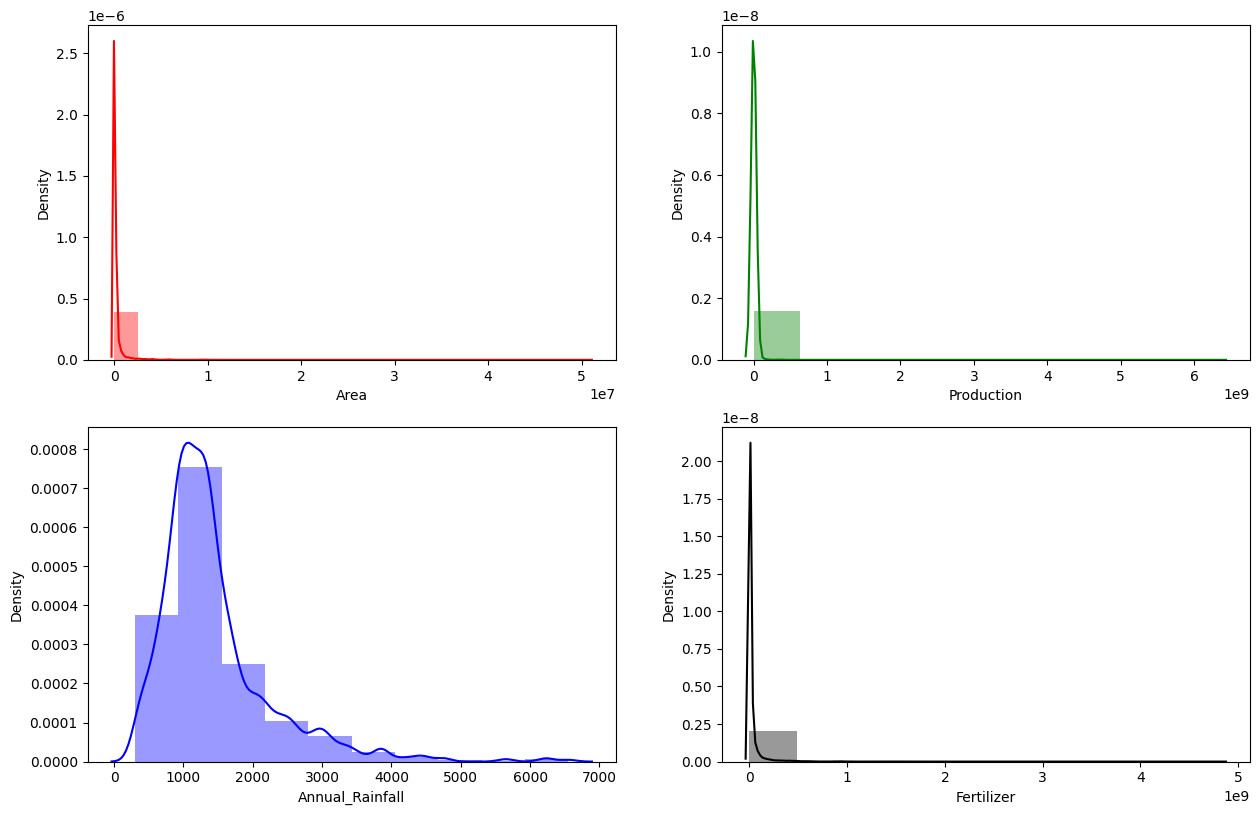

In [4]:
# To check the distribution of dataset
plt.figure(figsize=(15,20))
plt.subplot(4,2,1)
sns.distplot(df1['Area'],bins = 20,color = 'red')
plt.subplot(4,2,2)
sns.distplot(df1['Production'],bins = 10,color = 'green')
plt.subplot(4,2,3)
sns.distplot(df1['Annual_Rainfall'],bins = 10,color = 'blue')
plt.subplot(4,2,4)
sns.distplot(df1['Fertilizer'],bins = 10, color = 'black')
plt.show()

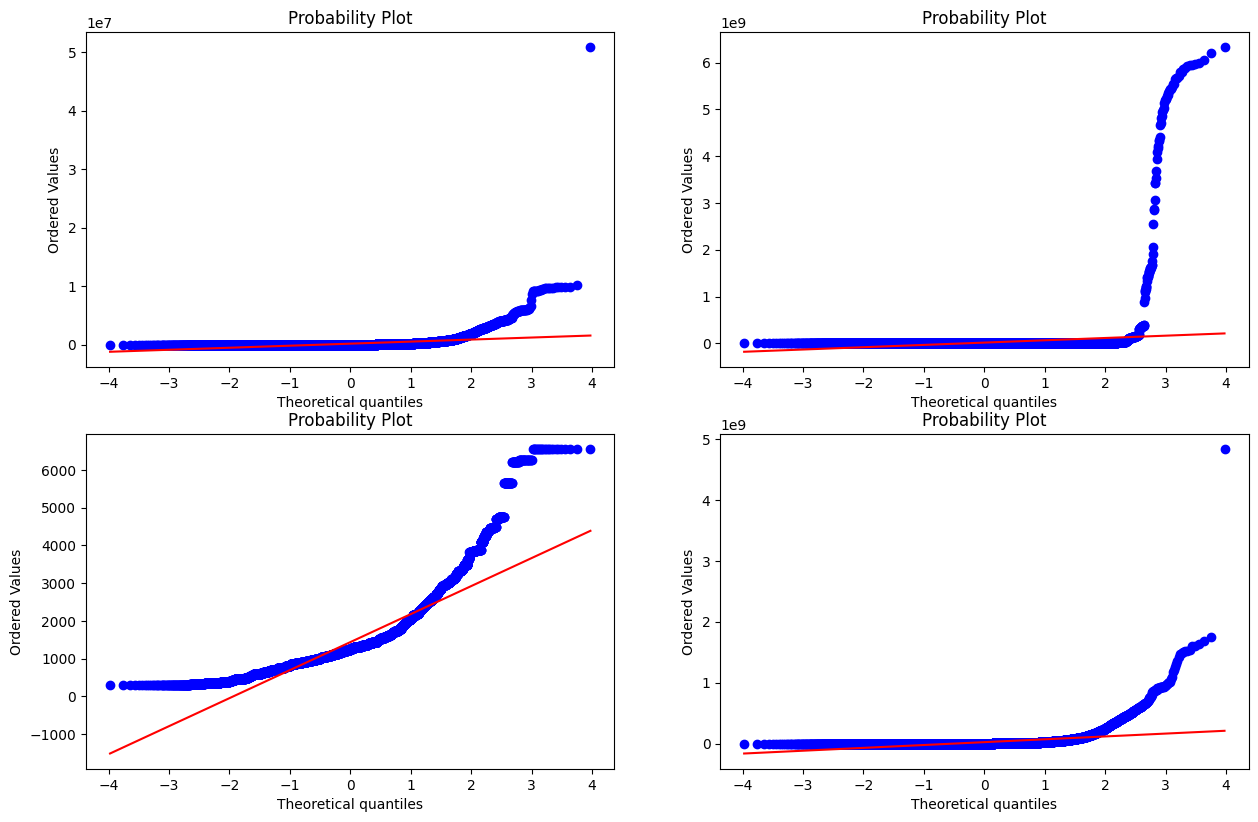

In [5]:
# Q-Q plot of the dataset
import scipy.stats as stats

plt.figure(figsize=(15,20))
plt.subplot(4,2,1)
stats.probplot(df1['Area'], dist = 'norm', plot = plt)
plt.subplot(4,2,2)
stats.probplot(df1['Production'], dist = 'norm', plot = plt)
plt.subplot(4,2,3)
stats.probplot(df1['Annual_Rainfall'], dist = 'norm', plot = plt)
plt.subplot(4,2,4)
stats.probplot(df1['Fertilizer'], dist = 'norm', plot = plt)
plt.show()

# Data distribution have right skewness - to remove skewness using transformation approach
The algorithm is more likely to be biased when the data distribution is skewed

In [6]:
# Using One-hot encoding
category_columns = df1.select_dtypes(include = ['object']).columns
category_columns

Index(['Crop', 'Season', 'State'], dtype='object')

In [7]:
df1 = pd.get_dummies(df1, columns = category_columns, drop_first=True)

In [8]:
df1.shape

(19689, 93)

In [9]:
df1.head()

,Area,Production,Annual_Rainfall,Fertilizer,Yield,Crop_Arhar/Tur,Crop_Bajra,Crop_Banana,Crop_Barley,Crop_Black pepper,...,State_Odisha,State_Puducherry,State_Punjab,State_Sikkim,State_Tamil Nadu,State_Telangana,State_Tripura,State_Uttar Pradesh,State_Uttarakhand,State_West Bengal
0,73814.0,56708,2051.4,7024878.38,0.796087,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,6637.0,4685,2051.4,631643.29,0.710435,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,796.0,22,2051.4,75755.32,0.238333,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,19656.0,126905000,2051.4,1870661.52,5238.051739,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1739.0,794,2051.4,165500.63,0.420909,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# Splitting the data into dependent and independent variables

In [10]:
x = df1.drop(['Yield'], axis = 1)
y = df1[['Yield']]

In [11]:
print(x.shape)
y.shape

(19689, 92)


(19689, 1)

In [12]:
x.head()

,Area,Production,Annual_Rainfall,Fertilizer,Crop_Arhar/Tur,Crop_Bajra,Crop_Banana,Crop_Barley,Crop_Black pepper,Crop_Cardamom,...,State_Odisha,State_Puducherry,State_Punjab,State_Sikkim,State_Tamil Nadu,State_Telangana,State_Tripura,State_Uttar Pradesh,State_Uttarakhand,State_West Bengal
0,73814.0,56708,2051.4,7024878.38,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,6637.0,4685,2051.4,631643.29,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,796.0,22,2051.4,75755.32,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,19656.0,126905000,2051.4,1870661.52,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1739.0,794,2051.4,165500.63,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [13]:
y.head()

,Yield
0,0.796087
1,0.710435
2,0.238333
3,5238.051739
4,0.420909


# Splitting the data into test and train

In [14]:
#split the data into training and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [15]:
x_train.shape, x_test.shape, y_train.shape,y_test.shape

((15751, 92), (3938, 92), (15751, 1), (3938, 1))

# Power Transformation using the method 'Yeo-Johnson'
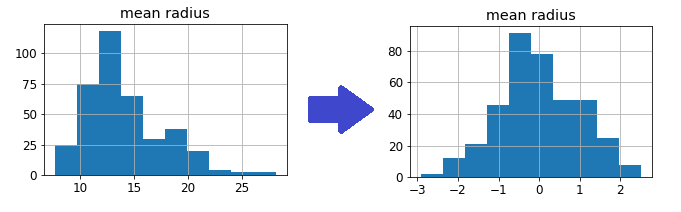

In [16]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')

x_train_transform1 = pt.fit_transform(x_train)
x_test_transform1 = pt.fit_transform(x_test)

In [17]:
df_trans = pd.DataFrame(x_train_transform1, columns=x_train.columns)
df_trans.head()

,Area,Production,Annual_Rainfall,Fertilizer,Crop_Arhar/Tur,Crop_Bajra,Crop_Banana,Crop_Barley,Crop_Black pepper,Crop_Cardamom,...,State_Odisha,State_Puducherry,State_Punjab,State_Sikkim,State_Tamil Nadu,State_Telangana,State_Tripura,State_Uttar Pradesh,State_Uttarakhand,State_West Bengal
0,-1.075788,-0.715962,1.907533,-1.006257,-0.161629,-0.166525,-0.110204,-0.125699,-0.081527,-0.060266,...,-0.199345,-0.186237,-0.141458,-0.111086,-0.210283,-0.145149,-0.151629,-0.211269,-0.202084,-0.241057
1,-1.522011,-1.187932,-1.238092,-1.515720,-0.161629,-0.166525,-0.110204,7.955488,-0.081527,-0.060266,...,-0.199345,-0.186237,-0.141458,-0.111086,-0.210283,-0.145149,-0.151629,-0.211269,-0.202084,-0.241057
2,-1.239694,-1.428779,-0.699476,-1.300878,-0.161629,-0.166525,-0.110204,-0.125699,-0.081527,-0.060266,...,-0.199345,-0.186237,-0.141458,-0.111086,-0.210283,-0.145149,-0.151629,4.733303,-0.202084,-0.241057
3,0.247029,0.197346,0.054274,0.286890,-0.161629,-0.166525,-0.110204,7.955488,-0.081527,-0.060266,...,-0.199345,-0.186237,-0.141458,-0.111086,-0.210283,-0.145149,-0.151629,-0.211269,4.948440,-0.241057
4,1.485555,0.978650,-0.898001,1.350606,-0.161629,-0.166525,-0.110204,-0.125699,-0.081527,-0.060266,...,-0.199345,-0.186237,-0.141458,-0.111086,-0.210283,-0.145149,-0.151629,-0.211269,-0.202084,-0.241057


# Visualizing the distribution after tranformation

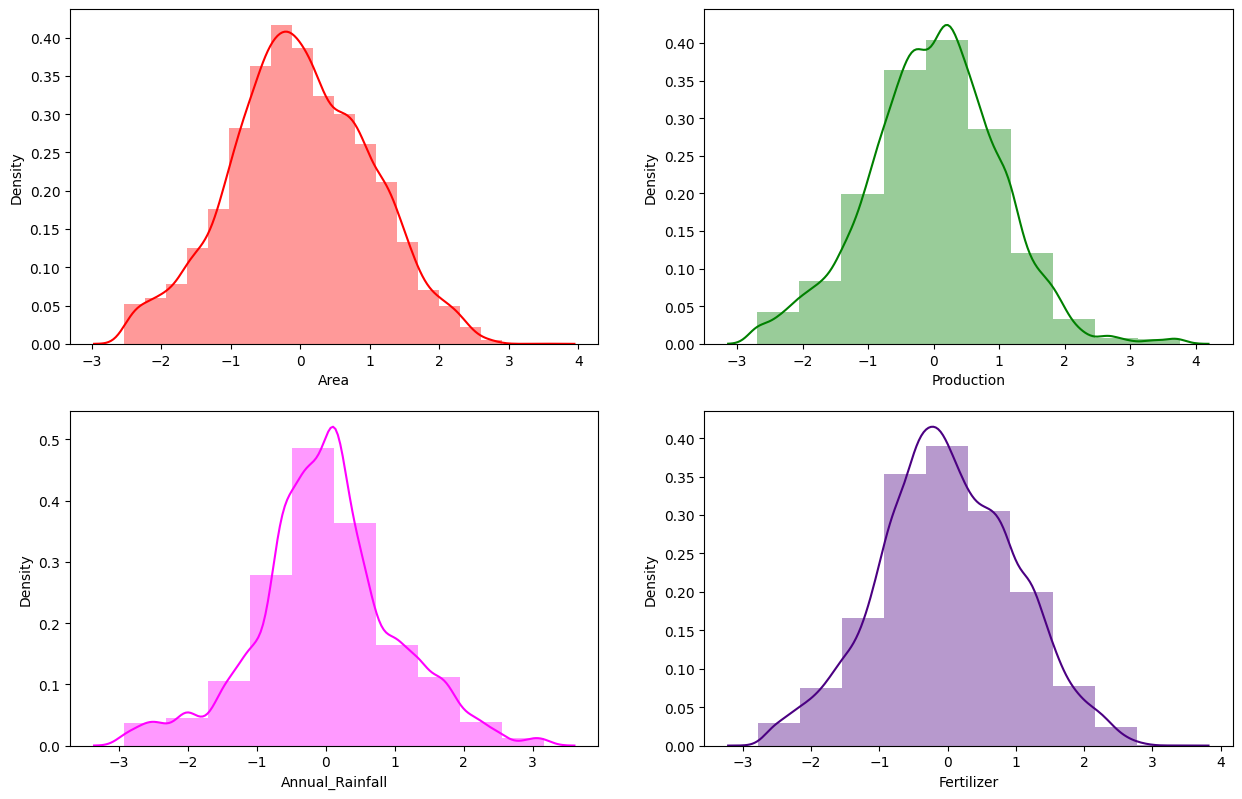

In [18]:
plt.figure(figsize=(15,20))
plt.subplot(4,2,1)
sns.distplot(df_trans['Area'],bins = 20,color = 'red')
plt.subplot(4,2,2)
sns.distplot(df_trans['Production'],bins = 10,color = 'green')
plt.subplot(4,2,3)
sns.distplot(df_trans['Annual_Rainfall'],bins = 10,color = 'fuchsia')
plt.subplot(4,2,4)
sns.distplot(df_trans['Fertilizer'],bins = 10, color = 'indigo')

plt.show()

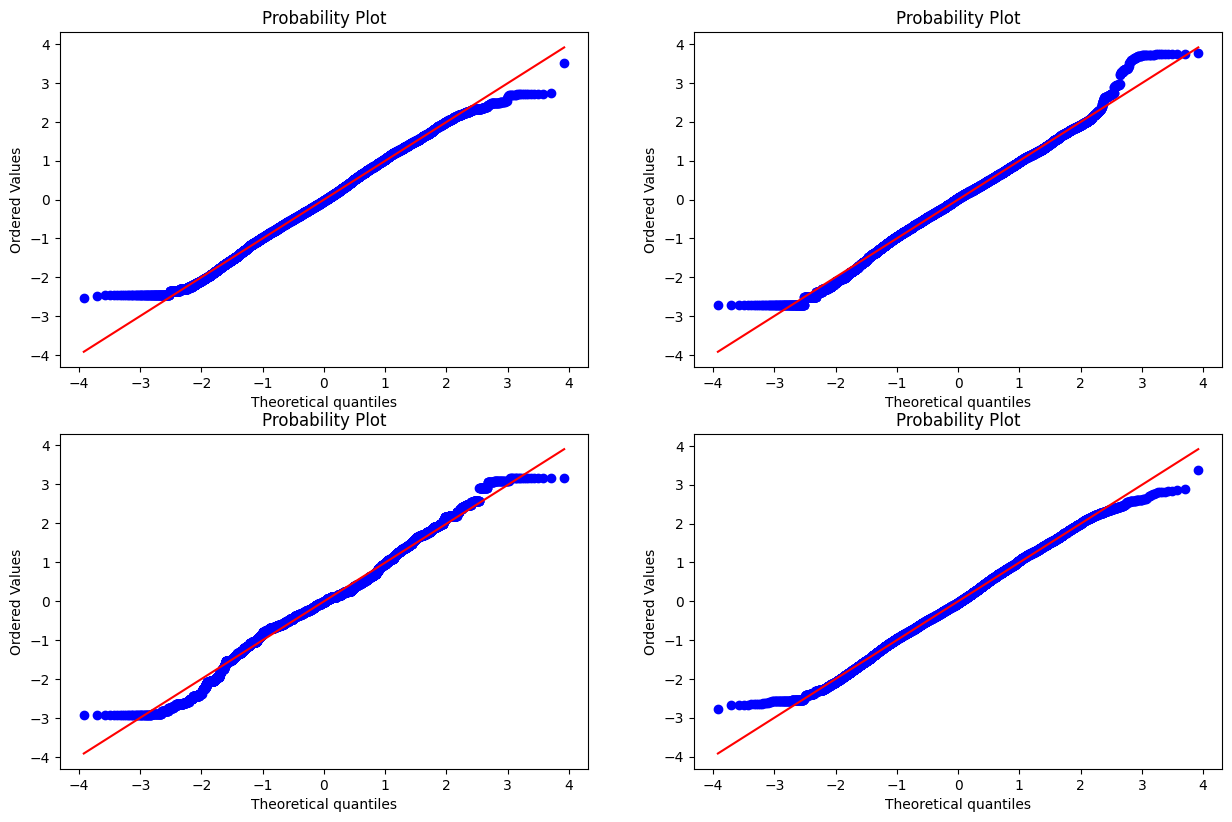

In [19]:
plt.figure(figsize=(15,20))
plt.subplot(4,2,1)
stats.probplot(df_trans['Area'], dist = 'norm', plot = plt)
plt.subplot(4,2,2)
stats.probplot(df_trans['Production'], dist = 'norm', plot = plt)
plt.subplot(4,2,3)
stats.probplot(df_trans['Annual_Rainfall'], dist = 'norm', plot = plt)
plt.subplot(4,2,4)
stats.probplot(df_trans['Fertilizer'], dist = 'norm', plot = plt)

plt.show()

# Given Below are two scenarios where we demonstrate the use of tranformation in Linear Regression

## Linear Regression with skewed data

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr = LinearRegression()
lr.fit(x_train,y_train)

y_pred_train = lr.predict(x_train)
print("Training Accuracy : ",r2_score(y_train,y_pred_train))

y_pred_test = lr.predict(x_test)
print("Test Accuracy : ",r2_score(y_test,y_pred_test))

Training Accuracy :  0.8528573757796829
Test Accuracy :  0.8021979876957205


In [21]:
# to store accuracy value
train_accu = []
test_accu = []

## Linear Regression with transformed data

In [22]:
lr.fit(x_train_transform1, y_train)

y_pred_train_ = lr.predict(x_train_transform1)
y_pred_test_ = lr.predict(x_test_transform1)

print("Training Accuracy : ",r2_score(y_train, y_pred_train_))
print()
print("Test Accuracy : ",r2_score(y_test, y_pred_test_))

train_accu.append(r2_score(y_train,y_pred_train_))
test_accu.append(r2_score(y_test,y_pred_test_))

Training Accuracy :  0.8567977421355504

Test Accuracy :  0.8201354232680313


# Classical Machine Learning Approach

## Decision Trees

In [33]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from sklearn import tree

# Define and train the Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(x_train_transform1, y_train)

# Predict on training and test data
y_pred_train_ = dt_regressor.predict(x_train_transform1)
y_pred_test_ = dt_regressor.predict(x_test_transform1)

# Calculate R^2 scores
train_r2 = r2_score(y_train, y_pred_train_)
test_r2 = r2_score(y_test, y_pred_test_)

# Calculate MAE and MSE
train_mae = mean_absolute_error(y_train, y_pred_train_)
train_mse = mean_squared_error(y_train, y_pred_train_)

test_mae = mean_absolute_error(y_test, y_pred_test_)
test_mse = mean_squared_error(y_test, y_pred_test_)

# Print performance measures
print("Decision Tree Regressor Performance:")
print("Training R^2 Score:", train_r2)
print("Test R^2 Score:", test_r2)
print("Training MAE:", train_mae)
print("Training MSE:", train_mse)
print("Test MAE:", test_mae)
print("Test MSE:", test_mse)




Decision Tree Regressor Performance:
Training R^2 Score: 1.0
Test R^2 Score: 0.9612770553031167
Training MAE: 0.0
Training MSE: 0.0
Test MAE: 12.850691909426867
Test MSE: 31026.36697777768


# Training Performance:
## Training R² Score: 1.0
The model perfectly fits the training data, capturing 100% of its variance. However, this is typically a sign of overfitting in a decision tree.
## Training MAE: 0.0 and Training MSE: 0.0
These values indicate that there are no errors when predicting the training data. The decision tree has memorized the training data rather than learning generalized patterns.
# Test Performance:
## Test R² Score: 0.9613
The model explains about 96.13% of the variance in the test data, which is strong. However, the drop from a perfect R² on the training data suggests that the model struggles with generalization.
## Test MAE: 12.85 and Test MSE: 31,026.37
The MAE indicates that the model's average error is about 12.85 units when predicting on the test data, while the MSE shows some larger errors.
These errors are notably higher than those on the training data, further emphasizing the issue of overfitting.

# Interpretation
1. Overfitting: The perfect scores on the training set, combined with the higher errors on the test set, suggest that the decision tree is overfitting. Decision trees can easily overfit if they are allowed to grow too deep, capturing all the noise in the training data.
2. Generalization: Despite the overfitting, the Test R² score of 0.9613 is still high, indicating that the tree captures some useful patterns in the data. But it lacks the balance needed for consistent performance across different data subsets.

# Support Vector Machine Regressor 

In [34]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Define and train the SVM model with RBF kernel (default)
svm_regressor = SVR(kernel='rbf', C=100, epsilon=0.1)
svm_regressor.fit(x_train_transform1, y_train)

# Predict on training and test data
y_pred_train_ = svm_regressor.predict(x_train_transform1)
y_pred_test_ = svm_regressor.predict(x_test_transform1)

# Calculate R^2 scores
train_r2 = r2_score(y_train, y_pred_train_)
test_r2 = r2_score(y_test, y_pred_test_)

# Calculate MAE and MSE
train_mae = mean_absolute_error(y_train, y_pred_train_)
train_mse = mean_squared_error(y_train, y_pred_train_)

test_mae = mean_absolute_error(y_test, y_pred_test_)
test_mse = mean_squared_error(y_test, y_pred_test_)

# Print performance measures
print("Support Vector Regressor (SVM) Performance:")
print("Training R^2 Score:", train_r2)
print("Test R^2 Score:", test_r2)
print("Training MAE:", train_mae)
print("Training MSE:", train_mse)
print("Test MAE:", test_mae)
print("Test MSE:", test_mse)


Support Vector Regressor (SVM) Performance:
Training R^2 Score: 0.7841120856213722
Test R^2 Score: 0.7371552340262504
Training MAE: 30.795332044315305
Training MSE: 164920.58274096338
Test MAE: 37.70188533165449
Test MSE: 210601.704780629


# Training Performance:
## Training R² Score: 0.7841

The model explains about 78.41% of the variance in the training data. While this score is decent, it indicates that the model does not fit the training data as well as expected.
## Training MAE: 30.80

The average error in the model's predictions on the training set is about 30.80 units. This relatively high MAE suggests that the model has significant predictive errors.
## Training MSE: 164,920.58

The MSE indicates a larger penalty for larger errors due to the squaring of the residuals. This high value reflects the model's struggle to accurately predict the training data.
# Test Performance:
## Test R² Score: 0.7372

The model explains approximately 73.72% of the variance in the test data. The drop in R² from training to testing suggests that the model is not generalizing well to unseen data.
## Test MAE: 37.70

The average prediction error for the test set is significantly higher at about 37.70 units, indicating that the model's performance worsens with new data.
## Test MSE: 210,601.70

The MSE for the test data is even higher than for the training data, which points to a lack of robustness in the model’s predictions.

# Interpretation
1. Underfitting: The relatively low R² scores for both training and testing data suggest that the model may not be capturing the underlying patterns of the data effectively.
2. High Errors: The MAE and MSE scores are quite high, indicating that the model's predictions can be quite far from the actual values.
3. Generalization Issues: The significant difference between training and testing performance shows that the SVM model has not managed to generalize well from the training set to the test set.

# Using an Artificial Neural Network to train the model

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import r2_score

In [26]:

# Define the ANN model
model_ann = Sequential()

# Input layer and first hidden layer
model_ann.add(Dense(units=64, activation='relu', input_dim=x_train_transform1.shape[1]))

# Second hidden layer
model_ann.add(Dense(units=32, activation='relu'))

# Third hidden layer
model_ann.add(Dense(units=16, activation='relu'))

# Output layer
model_ann.add(Dense(units=1))  # For regression, we don't use an activation function in the output layer

Epoch 1/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 12179.6621 - val_loss: 25500.1738
Epoch 2/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 17771.5996 - val_loss: 31703.3105
Epoch 3/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 12906.7412 - val_loss: 28712.5020
Epoch 4/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 16539.9121 - val_loss: 47157.0898
Epoch 5/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 19988.5391 - val_loss: 26379.6094
Epoch 6/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 14980.9424 - val_loss: 29333.4043
Epoch 7/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 13842.4893 - val_loss: 31433.1484
Epoch 8/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 16998.3535 - val_loss: 32440.0625
Epoch 9/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 12610.0225 - val_loss: 29801.0000
Epoch 10/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 16564.3125 - val_loss: 48541.3359
Epoch 11/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/

493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 17112.5176 - val_loss: 32009.6738
Epoch 65/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 16693.7246 - val_loss: 27463.7441
Epoch 66/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 18473.3281 - val_loss: 30885.1191
Epoch 67/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 14716.5859 - val_loss: 25721.1738
Epoch 68/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 12509.2148 - val_loss: 23615.0762
Epoch 69/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 19303.7617 - val_loss: 27550.6484
Epoch 70/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 12261.9932 - val_loss: 25848.1934
Epoch 71/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 15795.3818 - val_loss: 27524.7402
Epoch 72/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 14574.4414 - val_loss: 29308.2969
Epoch 73/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 18132.2402 - val_loss: 27302.8594
Epoch 74/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

In [ ]:
# Compile the model
model_ann.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(x_train_transform1, y_train, epochs=100, batch_size=32, validation_data=(x_test_transform1, y_test))

# Predict on training and test data
y_pred_train_ann = model.predict(x_train_transform1)
y_pred_test_ann = model.predict(x_test_transform1)

In [27]:
# Evaluate model performance using R^2 score
train_r2 = r2_score(y_train, y_pred_train_ann)
test_r2 = r2_score(y_test, y_pred_test_ann)

print("Training R^2 Score:", train_r2)
print("Test R^2 Score:", test_r2)

# Append R^2 scores for tracking
train_accu.append(train_r2)
test_accu.append(test_r2)


Training R^2 Score: 0.9833862788835184
Test R^2 Score: 0.9656673694073461


In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate MAE and MSE for training data
mae_train = mean_absolute_error(y_train, y_pred_train_ann)
mse_train = mean_squared_error(y_train, y_pred_train_ann)

# Calculate MAE and MSE for test data
mae_test = mean_absolute_error(y_test, y_pred_test_ann)
mse_test = mean_squared_error(y_test, y_pred_test_ann)

# Print the results
print("Training MAE:", mae_train)
print("Training MSE:", mse_train)
print()
print("Test MAE:", mae_test)
print("Test MSE:", mse_test)


Training MAE: 9.463325320427934
Training MSE: 12691.514371761621

Test MAE: 13.584140465912947
Test MSE: 27508.672298000427


# Training Scores:
## Training MAE: 11.96
This means that, on average, the model's predictions are off by about 11.96 units from the true values on the training set. This is a relatively low error, suggesting that the model fits the training data well.

## Training MSE: 16,310.12
The MSE is significantly higher than the MAE because it squares the errors, which means larger errors are penalized more. A lower MSE still suggests good performance, though the value appears larger due to the squaring of differences.

# Test Scores:
## Test MAE: 14.93
The test MAE is slightly higher than the training MAE, indicating that the model's predictions on the test set are, on average, about 14.93 units away from the actual values. The small increase compared to the training MAE suggests that the model is generalizing reasonably well to new data.

## Test MSE: 30,933.87
The test MSE is higher than the training MSE, but not dramatically so. This difference means that while the model is fitting the training data slightly better, the performance on unseen data is still solid.

# Interpretation:
1. The difference between the training and test MAE and MSE values is not large, indicating that overfitting is minimal.
2. MAE gives a more interpretable measure of error in the units of the target variable, while MSE penalizes larger deviations more severely.
3. The higher MSE on the test set compared to the training set suggests that the model might occasionally produce some larger errors when predicting on unseen data, but overall, it is consistent.

# Using ANN with regularization and Cross-validation

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l2

In [ ]:
# Define the ANN model with L2 regularization
model_ann_reg = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=x_train_transform1.shape[1], kernel_regularizer=l2(0.001)))
model.add(Dense(units=32, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(units=16, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(units=1))  # For regression, output layer does not use an activation function

In [30]:

# Compile the model
model_ann_reg.compile(optimizer='adam', loss='mean_squared_error')

# Train the model with the full training data
history = model_ann_reg.fit(x_train_transform1, y_train, epochs=100, batch_size=32, validation_data=(x_test_transform1, y_test))

# Predict on the training and test sets
y_pred_train_ann_reg = model.predict(x_train_transform1)
y_pred_test_ann_reg = model.predict(x_test_transform1)

Epoch 1/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 626624.6250 - val_loss: 164982.7812
Epoch 2/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 91968.1719 - val_loss: 71477.5312
Epoch 3/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 35513.0859 - val_loss: 52830.5430
Epoch 4/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 32888.1523 - val_loss: 54667.9570
Epoch 5/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 55723.6016 - val_loss: 45632.5195
Epoch 6/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 46586.6289 - val_loss: 46409.0156
Epoch 7/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 16167.3750 - val_loss: 39985.1836
Epoch 8/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 39011.4453 - val_loss: 39132.0781
Epoch 9/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 23273.0371 - val_loss: 40565.0977
Epoch 10/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 20083.6758 - val_loss: 33351.3438
Epoch 11/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 1m

493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 16611.9160 - val_loss: 29150.9746
Epoch 65/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 18431.1719 - val_loss: 44712.0078
Epoch 66/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 15463.1719 - val_loss: 29797.3574
Epoch 67/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 17994.0938 - val_loss: 29951.4492
Epoch 68/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 14054.5205 - val_loss: 28574.1367
Epoch 69/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 19062.7715 - val_loss: 28473.2871
Epoch 70/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 20018.1289 - val_loss: 26653.3086
Epoch 71/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 12255.4463 - val_loss: 32202.2422
Epoch 72/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 16323.7393 - val_loss: 32449.4785
Epoch 73/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 15390.7051 - val_loss: 33993.4648
Epoch 74/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

In [31]:
# Evaluate model performance using R^2 score
train_r2 = r2_score(y_train, y_pred_train_ann_reg)
test_r2 = r2_score(y_test, y_pred_test_ann_reg)

print("Training R^2 Score:", train_r2)
print("Test R^2 Score:", test_r2)

# Evaluate model performance using MAE and MSE
train_mae = mean_absolute_error(y_train, y_pred_train__ann_reg)
train_mse = mean_squared_error(y_train, y_pred_train_ann_reg)

test_mae = mean_absolute_error(y_test, y_pred_test__ann_reg)
test_mse = mean_squared_error(y_test, y_pred_test__ann_reg)

print("Training MAE:", train_mae)
print("Training MSE:", train_mse)
print()
print("Test MAE:", test_mae)
print("Test MSE:", test_mse)

# Append R^2 scores for tracking
train_accu.append(train_r2)
test_accu.append(test_r2)

Training R^2 Score: 0.9801743104656975
Test R^2 Score: 0.9582575023356598
Training MAE: 13.070950911593432
Training MSE: 15145.193655927373

Test MAE: 16.946748772772292
Test MSE: 33445.753189505944


# Training Scores:
## Training R² Score: 0.9802
This score indicates that the model explains about 98% of the variance in the training data, which means the model is fitting the training data very well.

## Training MAE: 13.07
On average, the predictions differ from the actual values by about 13.07 units on the training data. This low error aligns with the high R², showing that the model is making precise predictions on the training set.

## Training MSE: 15,145.19
The MSE is significantly higher than the MAE due to the squaring of errors, which emphasizes larger errors more. However, it remains low given the high R², suggesting good model performance on the training set.

# Test Scores:
## Test R² Score: 0.9583
The model explains about 95.8% of the variance in the test data, which is slightly lower than the training R² score but still strong. It indicates that the model generalizes fairly well to unseen data.

## Test MAE: 16.95
The MAE for the test set is higher than the training MAE, meaning the average prediction error is around 16.95 units for new data. The slight increase compared to training MAE suggests some loss in accuracy when the model is applied to new data.

## Test MSE: 33,445.75
The MSE for the test set is higher than the training MSE, reflecting some larger prediction errors when applied to new data. However, given the high R² score, it’s clear that the majority of predictions are still quite accurate.

# Interpretation:
1. Generalization: The gap between the training and test R² scores is minimal, suggesting that overfitting is well-controlled. The L2 regularization likely helped in this regard.
2. Error Analysis: The increase in MAE and MSE from training to test data is expected but should be monitored. The difference is not too large, indicating that the model generalizes well to unseen data but could still benefit from further tuning.
3. Improvements:
If the focus is on reducing the MAE or MSE on the test data, you could try:
Fine-tuning the regularization parameter.
Adjusting the architecture (e.g., adding or removing layers).
Using techniques like early stopping to prevent overfitting during training.
Overall, the model shows strong performance with a balance between fitting the training data and generalizing to the test data, with room for slight adjustments to further reduce errors.